In [1]:
!nvidia-smi

Tue Dec 12 14:04:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!wget https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1 -O pothole_dataset_v8.zip

--2023-12-12 14:04:36--  https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip [following]
--2023-12-12 14:04:36--  https://www.dropbox.com/s/dl/qvglw8pqo16769f/pothole_dataset_v8.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc06be77fed6991ceaa6bce52b.dl.dropboxusercontent.com/cd/0/get/CJQYynT1IjDYu7lZbVwuB2mwFe-KRLAmcq7dtBIxHLmjtIZdyCRzDabQc-WrVnqGpnAtezKZhzDw3MRC2fLwucOZmo09H6IJbl2Ml9OVSa2X-bAM4AcuKqQZ_-y9bwbf0JT-LmLwbXN-4Ep2IopHJFlX/file?dl=1# [following]
--2023-12-12 14:04:36--  https://ucbc06be77fed6991ceaa6bce52b.dl.dropboxusercontent.com/cd/0/get/CJQYynT1IjDYu7lZbVwuB2mwFe-KRLAmcq7dtBIxHLmjtIZdyCRzDabQc-WrVnqGpnAtez

In [4]:
!unzip pothole_dataset_v8.zip

Streaming output truncated to the last 5000 lines.
  inflating: pothole_dataset_v8/train/images/Japan_009520.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009663.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009697.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009765.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009832.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009915.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_009935.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010200.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010219.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010245.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010388.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010507.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010510.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_010532.jpg  
  inflating: pothole_dataset_v8/train/images/Japan_01

In [5]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 7.3 MB/s eta 0:00:00


In [6]:
# %%writefile pothole_v8.yaml
# path: 'pothole_dataset_v8/'
# train: 'train/images'
# val: 'valid/images'

# # class names
# names:
#   0: 'pothole'

In [7]:
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/pothole_dataset_v8/pothole.yaml',
   imgsz=1280,
   epochs=7,
   batch=8,
   name='/content/bestpathole'
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 65.4MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/pothole_dataset_v8/pothole.yaml, epochs=7, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=bestpathole, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 29.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/pothole_dataset_v8/train/labels... 6960 images, 10 backgrounds, 0 corrupt: 100%|██████████| 6962/6962 [00:07<00:00, 892.01it/s]

train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0012012.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0052120.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0063926.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0063927.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064103.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064146.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064186.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064187.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064409.jpg: 4 duplicate labels removed
train: WARNING ⚠️ /content/pothole_dataset_v8/train/images/G0064410.jpg: 4 duplicate labels removed


train: New cache created: /content/pothole_dataset_v8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/pothole_dataset_v8/valid/labels... 271 images, 0 backgrounds, 0 corrupt: 100%|██████████| 271/271 [00:00<00:00, 620.64it/s]

val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011603.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011614.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011616.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011661.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011662.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011664.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011677.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011678.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011705.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/pothole_dataset_v8/valid/images/G0011769.jpg: 3 duplicate labels removed
val: WARNING ⚠️ /con

Plotting labels to /content/bestpathole/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to /content/bestpathole
Starting training for 7 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/7      5.03G      2.185      4.151      1.844          4       1280: 100%|██████████| 871/871 [09:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]

                   all        271        716      0.258      0.217      0.145     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/7      4.44G      2.176      2.645      1.879          2       1280: 100%|██████████| 871/871 [09:15<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]

                   all        271        716      0.307      0.205      0.169      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/7       4.5G      2.135      2.436      1.822          2       1280: 100%|██████████| 871/871 [09:16<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:12<00:00,  1.34it/s]

                   all        271        716      0.458      0.208        0.2     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/7       4.5G      2.044       2.28      1.753          8       1280: 100%|██████████| 871/871 [08:59<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.52it/s]

                   all        271        716      0.476      0.258      0.255        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/7      4.53G      2.033      2.222      1.745          8       1280: 100%|██████████| 871/871 [08:56<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:10<00:00,  1.57it/s]

                   all        271        716      0.427      0.272      0.261       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/7      4.43G      1.971      2.091        1.7          9       1280: 100%|██████████| 871/871 [08:54<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.53it/s]

                   all        271        716      0.451       0.33      0.304      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/7      4.48G      1.922      1.979      1.649          4       1280: 100%|██████████| 871/871 [08:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]

                   all        271        716      0.571      0.314      0.337      0.145



7 epochs completed in 1.083 hours.
Optimizer stripped from /content/bestpathole/weights/last.pt, 6.3MB
Optimizer stripped from /content/bestpathole/weights/best.pt, 6.3MB

Validating /content/bestpathole/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:14<00:00,  1.14it/s]


                   all        271        716      0.571      0.315      0.336      0.145
Speed: 0.8ms preprocess, 6.8ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to /content/bestpathole


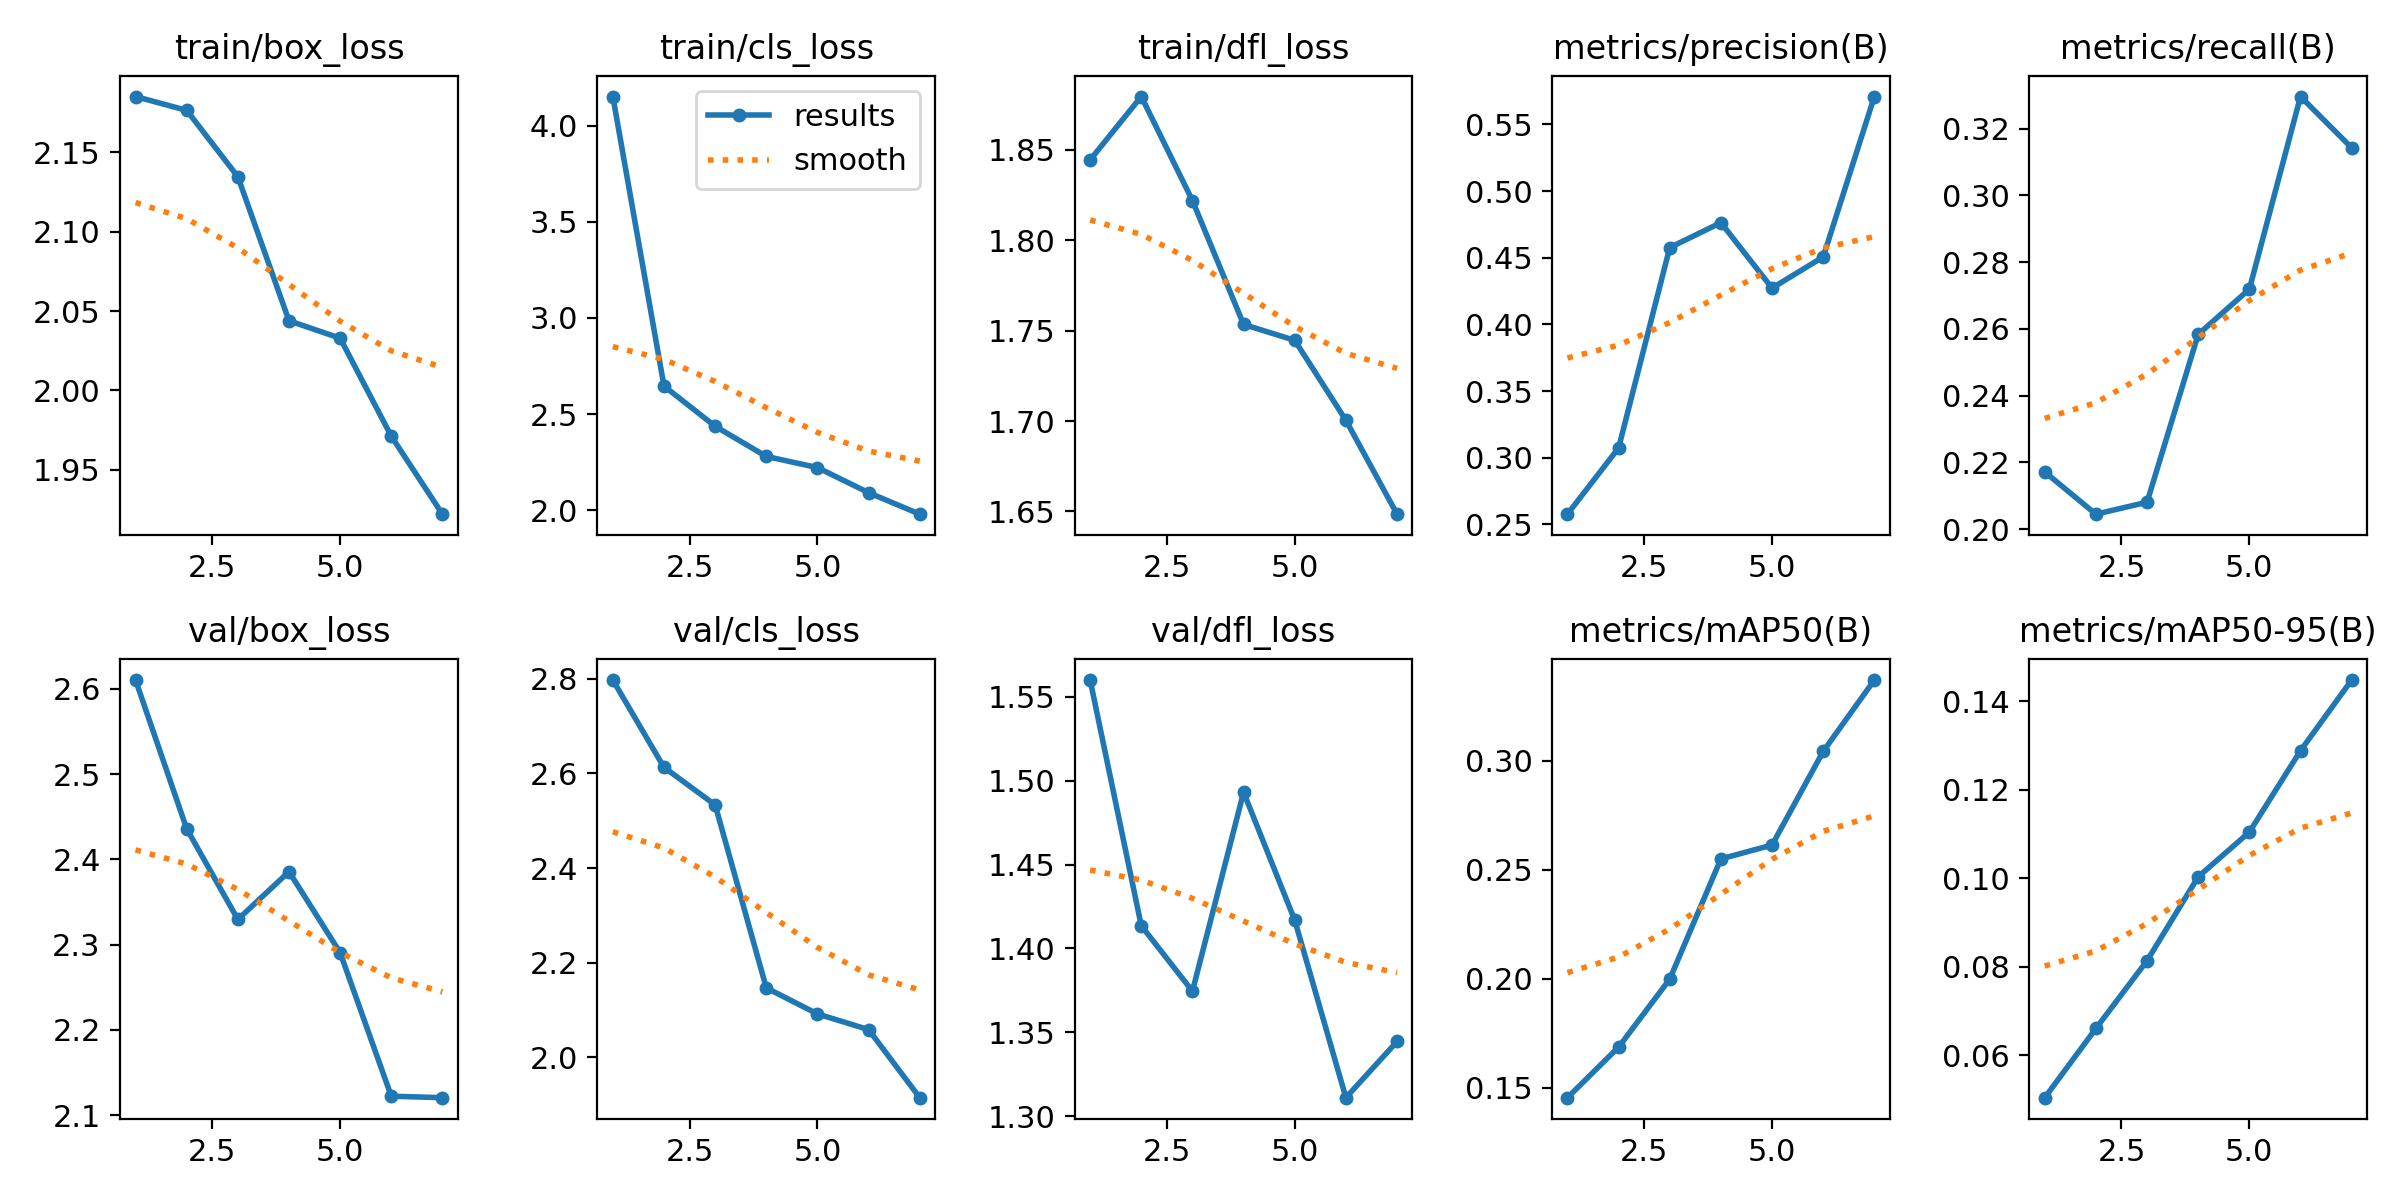

In [8]:
from PIL import Image
from IPython.display import display

# Specify the file path
image_path = '/content/bestpathole/results.png'

# Open the image using PIL
img = Image.open(image_path)

# Display the image
display(img)

In [9]:
results=model.predict(source="/content/PATHOLE.jpg",
              save=True, conf=0.5,iou=0.5)


results


image 1/1 /content/PATHOLE.jpg: 864x1280 (no detections), 96.2ms
Speed: 8.1ms preprocess, 96.2ms inference, 1.9ms postprocess per image at shape (1, 3, 864, 1280)
Results saved to runs/detect/bestpathole


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 orig_img: array([[[ 33,  32,  34],
         [ 34,  33,  35],
         [ 32,  34,  35],
         ...,
         [ 51,  70,  61],
         [ 42,  62,  50],
         [ 42,  62,  50]],
 
        [[ 34,  33,  35],
         [ 34,  33,  35],
         [ 32,  34,  35],
         ...,
         [ 49,  68,  59],
         [ 48,  65,  54],
         [ 42,  62,  50]],
 
        [[ 31,  33,  33],
         [ 31,  33,  33],
         [ 31,  33,  33],
         ...,
         [ 43,  60,  51],
         [ 43,  58,  50],
         [ 70,  87,  78]],
 
        ...,
 
        [[185, 190, 193],
         [186, 191, 194],
         [185, 188, 192],
         ...,
         [114, 116, 117],
         [108, 107, 109],
         [107, 107, 107]],
 
        [[178, 183, 186],
         [180, 185, 188],
         [179, 182, 186],
         ...,
         [110, 112, 113],
  


0: 864x1280 3 potholes, 14.4ms
Speed: 8.1ms preprocess, 14.4ms inference, 2.8ms postprocess per image at shape (1, 3, 864, 1280)
Object type: pothole
Coordinates: [334, 240, 662, 322]
Probability: 0.45
---
Object type: pothole
Coordinates: [408, 249, 691, 315]
Probability: 0.41
---
Object type: pothole
Coordinates: [282, 194, 437, 222]
Probability: 0.26
---


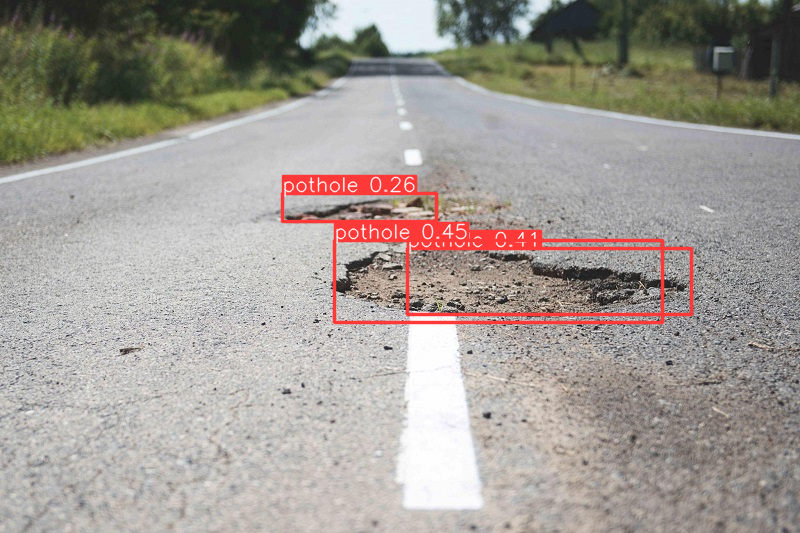

In [10]:
import cv2

image_path = '/content/PATHOLE.jpg'
img = Image.open(image_path)

# Make predictions
results_inference = model(img)

# Visualize the results
for result in results_inference:
    boxes = result.boxes
    for box in boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")

# Plot the results
plot = results_inference[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

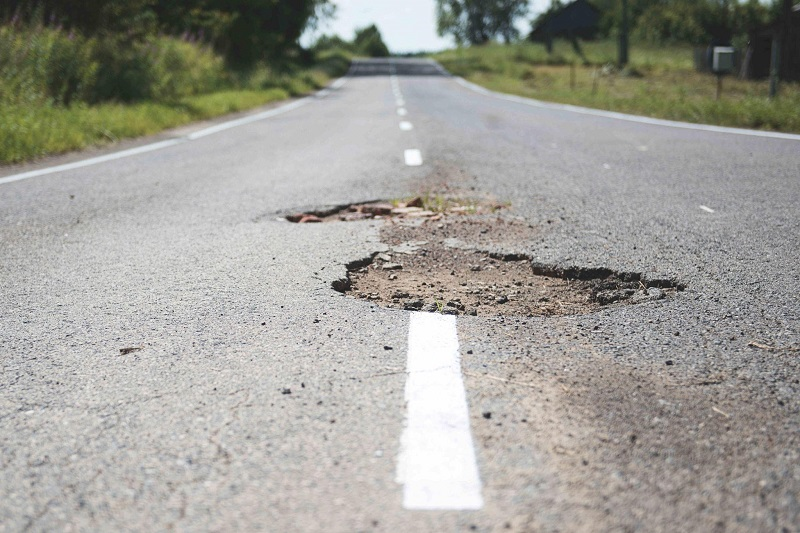

In [11]:
import cv2
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [12]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs


In [13]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/PATHOLE2.jpg: 864x1280 2 potholes, 15.2ms
Speed: 7.5ms preprocess, 15.2ms inference, 2.5ms postprocess per image at shape (1, 3, 864, 1280)
Results saved to runs/detect/predict
Object type: pothole
Coordinates: [334, 240, 662, 322]
Probability: 0.45
---
Object type: pothole
Coordinates: [408, 249, 691, 315]
Probability: 0.41
---


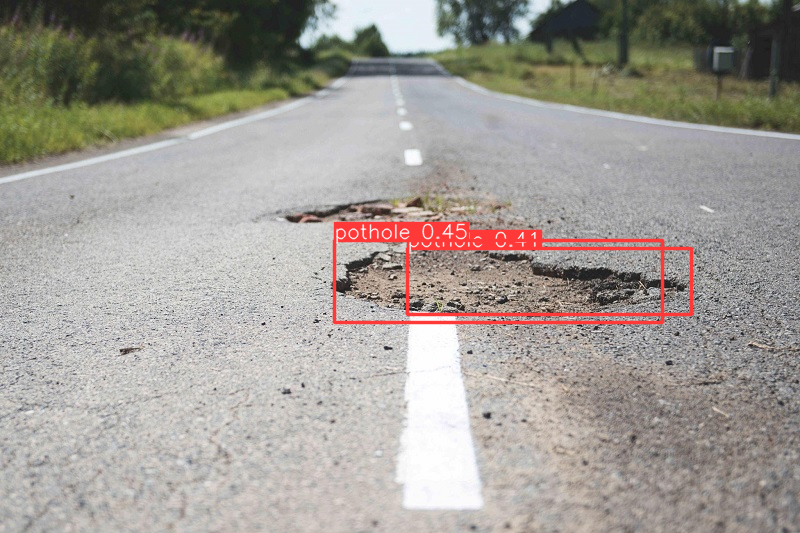

In [14]:
from ultralytics import YOLO

model = YOLO("/content/bestpathole/weights/best.pt")
# for camera : model.predict(source=0, save=True,conf=0.4,show=True)
results=model.predict(source='/content/PATHOLE2.jpg', save=True,conf=0.4,show=True)


# Visualize the results
for result in results:
    boxes = result.boxes
    for box in boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        print("---")

# Plot the results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))